<table align="left">
  <td>
    <a href="https://is.gd/KHp4J7" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **Proyecto IA**

## **Parte 1: Descripción del problema - Predicción de las Tarifas de los Taxis en Nueva York.**

En este proyecto se busca construir una red neuronal para realizar una tarea de regresión de estimación de tarifas de taxi. 


## Descripción del Dataset

El dataset que utilizaremos en este proyecto, proviene del conjunto de datos **New York City Taxi Fare Prediction** alojado en [Kaggle](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data).


Los taxis amarillos de Nueva York son quizás uno de los iconos más reconocibles de la ciudad. Decenas de miles de personas confían en los taxis como medio de transporte en la bulliciosa metrópolis. En los últimos años, el sector del taxi en Nueva York se ha visto sometido a una presión cada vez mayor por parte de las aplicaciones de viajes compartidos, como Uber.

Para hacer frente al desafío de las aplicaciones de viajes a domicilio, los taxis amarillos de Nueva York buscan modernizar sus operaciones y ofrecer una experiencia de usuario a la altura de Uber. 

En agosto de 2018, la Comisión de Taxis y Limusinas de Nueva York lanzó una nueva aplicación que permite a los viajeros reservar un taxi amarillo desde sus teléfonos. La aplicación proporciona el precio de la tarifa por adelantado antes de que llamen a un taxi. Crear un algoritmo que proporcione el precio de las tarifas por adelantado no es una tarea sencilla. 

El algoritmo tiene que tener en cuenta diversas variables ambientales, como las condiciones del tráfico, la hora del día y los lugares de recogida y entrega, para hacer una predicción precisa de la tarifa. 

La mejor manera de hacerlo es aprovechar el aprendizaje automático.

## **Dataset de las tarifas de los taxis de Nueva York**

El conjunto de datos que utilizaremos para este proyecto es el conjunto de datos de tarifas de taxis de Nueva York, proporcionado por Kaggle.

El conjunto de datos original contiene 55 millones de registros de viajes desde 2009 hasta 2015, incluyendo datos como los lugares de recogida y entrega, el número de pasajeros y la fecha de recogida. 

Este conjunto de datos ofrece una interesante oportunidad para utilizar grandes conjuntos de datos en proyectos de aprendizaje automático, así como para visualizar datos de geolocalización.

#### **Explorando los Datos**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/new-york-city-taxi-fare-prediction/NYC_taxi.csv', parse_dates=['pickup_datetime'], nrows=500000)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


#### **Se observa que hay ocho columnas en el conjunto de datos:***

* **key**: Esta columna parece idéntica a la columna pickup_datetime. Probablemente se utilizó como identificador único en la base de datos en la que se almacenó. Podemos eliminar esta columna sin que se pierda información.

* **fare_amount:** Esta es la variable objetivo que estamos tratando de predecir, el importe de la tarifa pagada al final del viaje.

* **pickup_datetime:** Esta columna contiene información sobre la fecha de recogida
(año, mes, día del mes), así como la hora (hora, minuto, segundos).

* **pickup_longitude y pickup_latitude:** La longitud y latitud del lugar de recogida.

* **dropoff_longitude y dropoff_latitude:** La longitud y latitud del lugar de el lugar de entrega.

* **passenger_count:** El número de pasajeros.

#### **Visualización de datos de geolocalización**

Los datos de longitud y latitud de recogida y entrega son cruciales para predecir el importe de la tarifa. Al fin y al cabo, las tarifas de los taxis de Nueva York están determinadas en gran medida por la distancia recorrida.

La latitud y la longitud son coordenadas en un sistema de coordenadas geográficas. Básicamente, la latitud y la longitud permiten especificar cualquier ubicación en la Tierra mediante un conjunto de coordenadas.

El siguiente diagrama muestra el sistema de coordenadas de latitud y longitud:

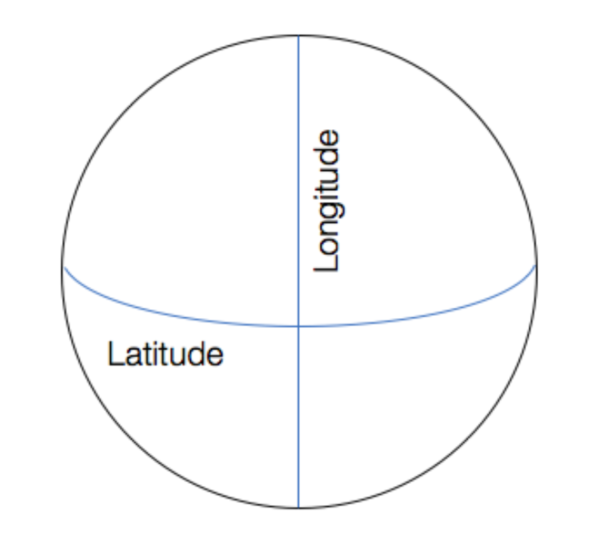

Podemos pensar en la Tierra como un diagrama de dispersión, cuyos ejes son la longitud y la latitud. Entonces, cada lugar de la Tierra es simplemente un punto en el diagrama de dispersión. De hecho, vamos a hacer exactamente eso; vamos a trazar las
latitudes y longitudes en un diagrama de dispersión.

En primer lugar, vamos a restringir nuestros puntos de datos a sólo las recogidas y dejadas dentro de NYC. **NYC tiene un rango de longitud aproximado de -74,05 a -73,75 y un rango de latitud de 40,63 a 40,85**:

In [ ]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75
# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85
df2 = df.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
  df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] <nyc_max_longitude)]
for lat in ['pickup_latitude', 'dropoff_latitude']:
  df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] <nyc_max_latitude)]

Se ha copiado el DataFrame original, **df**, en un nuevo DataFrame, **df2**, para evitar sobrescribir el DataFrame original.

Se define una nueva función que tomará el DataFrame como entrada, y trazará las ubicaciones de recogida en un gráfico de dispersión. 

También estamos interesados en superponer el gráfico de dispersión con algunos puntos de referencia clave en la ciudad de Nueva York. Una rápida búsqueda en Google nos dice que hay dos aeropuertos principales en NYC (JFK y LaGuardia), y sus coordenadas, junto con los principales distritos de NYC, son las siguientes:

In [ ]:
landmarks = {'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

#### **Función que utiliza matplotlib para trazar las ubicaciones de recogida en un gráfico de dispersión.**

In [ ]:
import matplotlib.pyplot as plt
def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize = (12,12)) # set figure size
    if points == 'pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], '*', markersize=15, alpha=1, color='r') # plot landmark location on map
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, landmarks[landmark][1]+0.005), color='r', backgroundcolor='w') # add 0.005 offset on landmark name for aesthetics purposes
  
    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

#### **Implementación de la Función**

El siguiente gráfico de dispersión muestra los lugares de recogida.



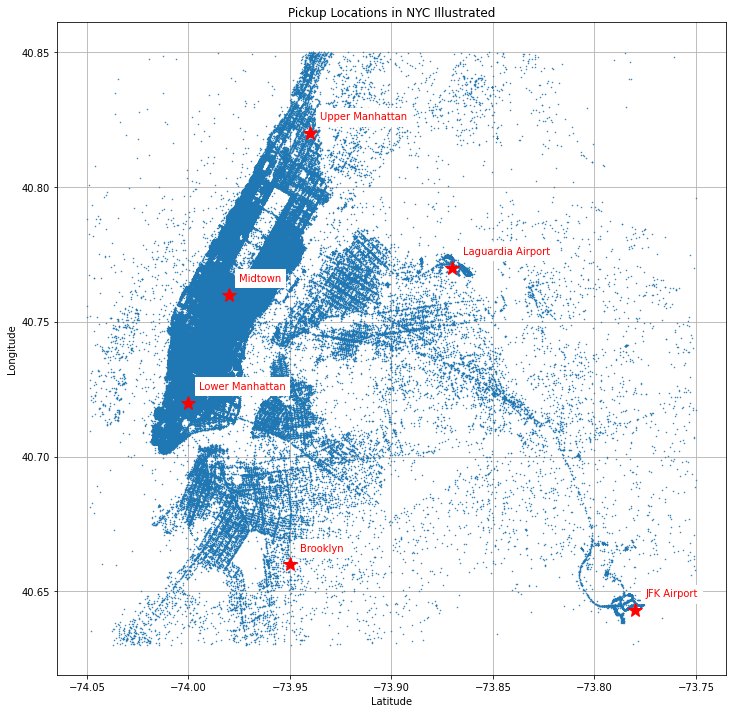

In [ ]:
plot_lat_long(df2, landmarks, points='Pickup')

Sólo con trazar las ubicaciones de las recogidas en un gráfico de dispersión, se observa un mapa de Nueva York, junto con las cuadrículas por las que se conocen las calles de Nueva York. A partir del gráfico de dispersión anterior, se pueden hacer algunas observaciones:

En Manhattan, la mayoría de las recogidas se produjeron en torno a la zona de **Midtown**, seguida de **Lower Manhattan**. En comparación, hay muchas menos recogidas en **Upper Manhattan**. Esto tiene sentido, ya que **Upper Manhattan** es una zona residencial, mientras que en **Midtown** y **Lower Manhattan** hay más oficinas y atracciones turísticas. 

Las recogidas son escasas fuera de Manhattan. Los dos únicos casos atípicos se dan en los aeropuertos de **LaGuardia y JFK**.


El siguiente gráfico de dispersión muestra las ubicaciones en donde los taxis dejan a los pasajeros. 

Observemos las diferencias entre las ubicaciones de **Pickups y Drop off**.

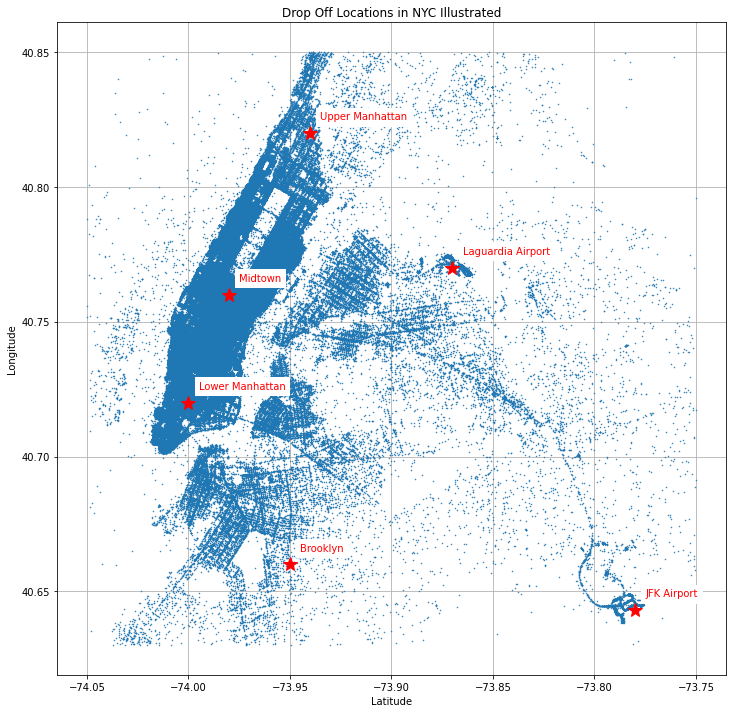

In [ ]:
plot_lat_long(df2, landmarks, points='Drop Off')

Si comparamos los gráficos de **Pickups y Drop off**, podemos ver claramente que hay más Drop off que Pickups en zonas residenciales como el Alto Manhattan y Brooklyn.

#### **Número de pasajeros por día y hora**

A continuación, se estudiará cómo varía el número de viajes por día y hora.

Recordemos que los datos brutos contienen una única columna **pickup_datetime** que contiene la fecha y la hora de recogida en formato **datetime**. En primer lugar, vamos a separar el año, el mes, el día, el día de la semana y la hora de recogida de la columna original **pickup_datetime** en diferentes columnas:

In [ ]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

Como se ha utilizado previamente el parámetro **parse_dates** al importar los datos a pandas, se puede identificar y separar fácilmente los componentes de año, mes, día y hora utilizando la función dt en pandas.

A continuación se traza un histograma para analizar la distribución de los viajes a lo largo de la semana:

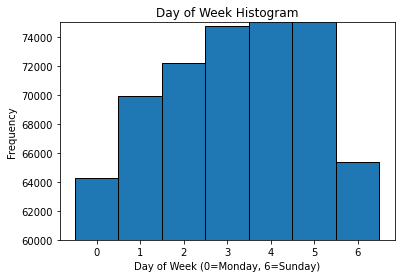

In [ ]:
import numpy as np
df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black',ylim=(60000,75000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

Resulta interesante observar que el número de viajes no se distribuye uniformemente en cada día de la semana. Por el contrario, el número de viajes aumenta linealmente de lunes a viernes, alcanzando un máximo el viernes. 
Los fines de semana se observa un ligero descenso en el número de viajes el sábado, antes de caer bruscamente el domingo.


También se puede visualizar el número de viajes por hora: Se observa el siguiente histograma para la hora de recogida:

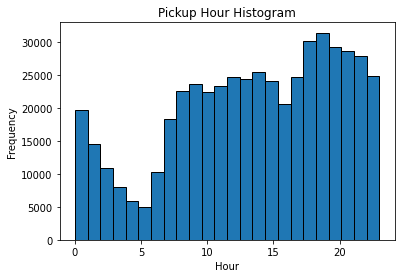

In [ ]:
df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

Se obsrva que hay más viajes durante la hora punta de la tarde, en comparación con la hora punta de la mañana. De hecho, el número de viajes es bastante constante a lo largo del día. 
A partir de las 6 de la tarde, el número de viajes aumenta y alcanza su punto máximo a las 7 de la tarde, antes de descender a partir de las 11 de la noche.

#**Parte 3: Preprocesado de los datos**

En esta fase se busca eliminar datos perdidos y anomalias con el fín de mejorar la calidad y la cantidad de las caracteristicas antes de realizar el entrenamiento de la red neuronal. 

#### **Tratamiento de los valores perdidos y de las anomalías de los datos**

Comprobemos si hay valores perdidos en el conjunto de datos:

In [ ]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


Se ve que sólo hay cinco filas (de 500.000 filas) con datos perdidos. Con un porcentaje de datos faltantes de sólo el 0,001%, se procede a eliminar esas cinco filas con datos perdidos:

In [ ]:
df = df.dropna()

En este punto, se comprueban los datos para ver si hay valores atípicos. En un conjunto de datos tan masivo como éste, es inevitable que haya valores atípicos, que pueden sesgar el modelo.

Resumen estadístico de los datos para ver la distribución:

In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445,2011.739129,6.268617,15.684239,3.042020,13.510843
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391,1.860897,3.437798,8.681092,1.949243,6.511596
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


La tarifa más baja del conjunto de datos es de **$-44,90**. Eso no tiene sentido; dado que las tarifas no pueden ser negativas. Además, la tarifa más alta es de 500 dólares. ¿han timado al pasajero? ¿O se trata de un error? 

Histograma para entender mejor la distribución de las tarifas:


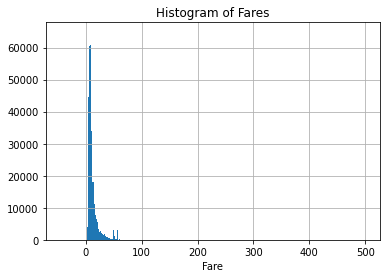

In [ ]:
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

No parece que haya demasiados valores atípicos, por lo que podemos eliminarlos con seguridad. Otra tendencia interesante que se puede observar en el histograma es que hay un pequeño pico en las tarifas en torno a los 50 dólares. ¿Podría tratarse de una tarifa fija desde un lugar concreto? Las ciudades suelen aplicar tarifas fijas para los viajes desde y hacia los aeropuertos. Una rápida búsqueda en Google nos dice que los viajes hacia y desde el aeropuerto JFK tienen una tarifa fija de 52 dólares más peajes. Esta podría ser la razón del pico en el histograma en torno a los 50 dólares.


Por ahora, se eliminan las filas con tarifas inferiores a 0 dólares y superiores a 100 dólares:

In [ ]:
df = df[(df['fare_amount'] >=0) & (df['fare_amount'] <= 100)]

De la tabla anterior, podemos ver que también hay valores atípicos en la columna **passenger_count**. Vamos a trazar un histograma del recuento de pasajeros para ver su distribución:

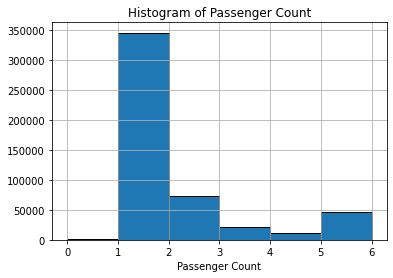

In [ ]:
df['passenger_count'].hist(bins=6, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

Se puede ver que hay un pequeño porcentaje de filas con 0 pasajeros. En lugar de descartar esas filas, se sustituyen los valores atípicos por la moda (es decir, 1 recuento de pasajeros):

In [ ]:
df.loc[df['passenger_count']==0, 'passenger_count'] = 1

A continuación, se inspeccionan los datos de latitud y longitud de recogida y drop off para comprobar si hay valores atípicos. 

Se traza un gráfico de dispersión sin la restricción de que los puntos debían estar situados dentro de los límites de la ciudad de Nueva York.

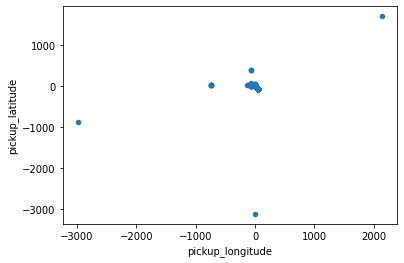

In [ ]:
df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()

¿Observan en dónde están los valores atípicos? Los puntos de la periferia del gráfico de dispersión son valores atípicos. Tienen valores de latitud tan altos como 1000 y tan bajos como -3000. 

El sistema de coordenadas geográficas de la Tierra no tiene latitudes y longitudes tan extremas. Por esto se pueden eliminar esos valores atípicos:

In [ ]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75
# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

# only consider locations within NYC
for long in ['pickup_longitude', 'dropoff_longitude']:
  df = df[(df[long] > nyc_min_longitude) & (df[long] <nyc_max_longitude)]
for lat in ['pickup_latitude', 'dropoff_latitude']:
  df = df[(df[lat] > nyc_min_latitude) & (df[lat] <nyc_max_latitude)]

#### **Resumen**:

Resumiendo lo hecho para el preprocesamiento de datos. En primer lugar, se visualizó que los valores perdidos sólo constituyen el 0,001% del conjunto de datos, por lo que se eliminaron con seguridad sin afectar a la cantidad de los datos de entrenamiento. 

A continuación, se visualizó que hay valores atípicos en **fare_amount y passenger_count**, así como en la **latitud y longitud de recogida y drop off**. Se eliminan los valores atípicos de **fare_amount, latitud y longitud**. En el caso de **passenger_count**, se sustituyeron las filas que tenían un recuento de pasajeros 0 por el modo **passenger count = 1**.

#### **Creación de Función de Preprocesamiento**

Se crea una función de ayuda que permita realizar todo el preprocesamiento de datos. En los proyectos de aprendizaje automático, con el fín de aplicar practicas de ingeniería de software, como la modularización del código, para mantener el
proyecto por el buen camino.

El siguiente código toma un DataFrame de pandas como entrada, y devuelve el DataFrame después de realizar el preprocesamiento de datos:

In [ ]:
def preprocess(df): 
    # remove missing values in the dataframe
    def remove_missing_values(df):
        df = df.dropna()
        return df
  
    # remove outliers in fare amount
    def remove_fare_amount_outliers(df, lower_bound, upper_bound):
        df = df[(df['fare_amount'] > lower_bound) & (df['fare_amount'] <= upper_bound)]
        return df
  
    # replace outliers in passenger count with the mode
    def replace_passenger_count_outliers(df):
        mode = df['passenger_count'].mode().values[0]
        df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1
        return df
  
    # remove outliers in latitude and longitude
    def remove_lat_long_outliers(df):
        # range of longitude for NYC
        nyc_min_longitude = -74.05
        nyc_max_longitude = -73.75

        # range of latitude for NYC
        nyc_min_latitude = 40.63
        nyc_max_latitude = 40.85
        
        # only consider locations within New York City
        for long in ['pickup_longitude', 'dropoff_longitude']:
          df = df[(df[long] > nyc_min_longitude) & (df[long] < nyc_max_longitude)]

        for lat in ['pickup_latitude', 'dropoff_latitude']:
          df = df[(df[lat] > nyc_min_latitude) & (df[lat] < nyc_max_latitude)]
        return df


    df = remove_missing_values(df)
    df = remove_fare_amount_outliers(df, lower_bound = 0, upper_bound = 100)
    df = replace_passenger_count_outliers(df)
    df = remove_lat_long_outliers(df)
    return df

#### **Ingeniería de características**
La ingeniería de características es el proceso de utilizar el conocimiento y dominio del problema para crear nuevas características para el algoritmo de aprendizaje automático. 

Se Crearan características basadas en la fecha y la hora de recogida, y características relacionadas con la ubicación.

#### **Características Temporales**

Como hemos visto antes en la de visualización de datos, el volumen de pasajeros depende en gran medida del día de la semana, así como de la hora del día.

Formato de **pickup_datetime**:

In [ ]:
df.head()['pickup_datetime']

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

Es importante recordar que las redes neuronales requieren características numéricas. Por lo tanto, no es posible entrenar la red neuronal utilizando una cadena de fecha. A continuación se separa la columna **pickup_datetime** en diferentes columnas para el **año**, el **mes**, el **día**, el **día de la semana** y la **hora**:

In [ ]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

print(df.loc[:5,['pickup_datetime', 'year', 'month','day', 'day_of_week', 'hour']])

            pickup_datetime  year  month  day  day_of_week  hour
0 2009-06-15 17:26:21+00:00  2009      6   15            0    17
1 2010-01-05 16:52:16+00:00  2010      1    5            1    16
2 2011-08-18 00:35:00+00:00  2011      8   18            3     0
3 2012-04-21 04:30:42+00:00  2012      4   21            5     4
4 2010-03-09 07:51:00+00:00  2010      3    9            1     7
5 2011-01-06 09:50:45+00:00  2011      1    6            3     9


Se observa que las nuevas columnas capturan la información original de la columna **pickup_datetime** en un formato adecuado para la red neuronal. Se procede a eliminar la columna pickup_datetime del DataFrame:

In [ ]:
df = df.drop(['pickup_datetime'], axis=1)

#### **Funciones de geolocalización**

El conjunto de datos contiene información sobre las coordenadas de recogida y entrega (**pickup - drop off**). Sin embargo, no hay información sobre la distancia entre los puntos de recogida y entrega, que es posiblemente el factor más importante a la hora de decidir las tarifas de los taxis. Por lo tanto, se crea una nueva función que calcule la distancia entre cada par de puntos de recogida y entrega.

Recordemos que la distancia euclidiana es la distancia en línea recta entre dos puntos cualesquiera:


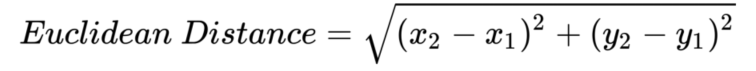

se Define una función para calcular la distancia euclidiana entre dos puntos cualesquiera, dadas la latitud y la longitud de los dos punto.

Y se aplica la función al DataFrame para crear la nueva columna de distancia:

In [ ]:
def euc_distance(lat1, long1, lat2, long2):
  return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

In [ ]:
df['distance'] = euc_distance(df['pickup_latitude'],
df['pickup_longitude'],
df['dropoff_latitude'],
df['dropoff_longitude'])

Una hipótesis era que el precio del viaje se encuentra estrechamente correlacionado con la distancia recorrida. Se procede a representar las dos variables en un gráfico de dispersión para analizar la correlación y ver si la intuición era correcta:

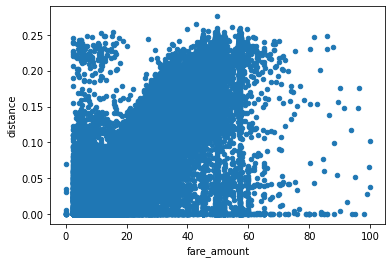

In [ ]:
df.plot.scatter('fare_amount', 'distance')
plt.show()

Podemos ver claramente que la hipótesis es correcta. Sin embargo, la distancia recorrida por sí sola no cuenta toda la historia. 

Si nos fijamos en el centro del gráfico, podemos ver tres líneas verticales de puntos. Estos datos atípicos parecen sugerir que hay ciertos viajes en los que la distancia recorrida no tuvo un impacto en el importe de la tarifa (que está entre 40 y 60 dólares para estos valores atípicos). Recordemos que hay ciertas recogidas cerca de los aeropuertos, y estas recogidas en los aeropuertos tienen una tarifa plana de 52 dólares más peajes. Esto podría explicar las tres líneas verticales de puntos entre 40 y 60 dólares.

Es claro que es necesario diseñar una nueva característica que informe a nuestra red neuronal de la distancia de recogida y entrega de los tres principales aeropuertos de Nueva York. 

Cuando se entrene la red neuronal con esta característica, la red debería aprender que las recogidas y las entregas (pickups - drop off) cerca de los aeropuertos tienen una tarifa plana de entre 40 y 60 dólares.

Se puede utilizar la función **euc_distance** definida anteriormente para calcular la distancia de recogida y entrega de los tres aeropuertos principales de Nueva York:

In [ ]:
airports = {'JFK_Airport': (-73.78,40.643),'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport' : (-74.18, 40.69)}

for airport in airports:
  df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'],
                                              df['pickup_longitude'],
                                              airports[airport][1],
                                              airports[airport][0])
  df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'],
                                               df['dropoff_longitude'],
                                               airports[airport][1],
                                               airports[airport][0])

Imprimamos las primeras filas, junto con algunas columnas relevantes para verificar que la función de distancia euclidiana funciona como es debido:

In [ ]:
df[['key', 'pickup_longitude', 'pickup_latitude','dropoff_longitude',
          'dropoff_latitude','pickup_dist_JFK_Airport','dropoff_dist_JFK_Airport']].head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport
0,2009-06-15 17:26:21.0000001,-73.844311,40.721319,-73.841610,40.712278,0.101340,0.092710
1,2010-01-05 16:52:16.0000002,-74.016048,40.711303,-73.979268,40.782004,0.245731,0.242961
2,2011-08-18 00:35:00.00000049,-73.982738,40.761270,-73.991242,40.750562,0.234714,0.237050
3,2012-04-21 04:30:42.0000001,-73.987130,40.733143,-73.991567,40.758092,0.225895,0.240846
4,2010-03-09 07:51:00.000000135,-73.968095,40.768008,-73.956655,40.783762,0.225847,0.225878


Observe que aún se encuentra la columna **key** en el conjunto de datos. Esta columna es similar a la columna pickup_datetime, y probablemente se utilizaba como identificador único en la base de datos en la que se almacenaba. 

Se puede eliminar esta columna de forma segura sin ninguna pérdida de información. Para eliminar la columna clave, utilice este comando:

In [ ]:
df = df.drop(['key'], axis=1)

Al igual que en una etapa anterior de preprocesamiento de datos, se construye una función de ayuda para resumir lo que se ha realizado.

In [ ]:
def feature_engineer(df):
    # create new columns for year, month, day, day of week and hour
    def create_time_features(df):
        df['year'] = df['pickup_datetime'].dt.year
        df['month'] = df['pickup_datetime'].dt.month
        df['day'] = df['pickup_datetime'].dt.day
        df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
        df['hour'] = df['pickup_datetime'].dt.hour
        df = df.drop(['pickup_datetime'], axis=1)
        return df

    # function to calculate euclidean distance
    def euc_distance(lat1, long1, lat2, long2):
        return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

    # create new column for the distance travelled
    def create_pickup_dropoff_dist_features(df):
        df['travel_distance'] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
        return df
  
    # create new column for the distance away from airports
    def create_airport_dist_features(df):
        airports = {'JFK_Airport': (-73.78,40.643),
                    'Laguardia_Airport': (-73.87, 40.77),
                    'Newark_Airport' : (-74.18, 40.69)}

        for airport in airports:
            df['pickup_dist_' + airport] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], airports[airport][1], airports[airport][0])
            df['dropoff_dist_' + airport] = euc_distance(df['dropoff_latitude'], df['dropoff_longitude'], airports[airport][1], airports[airport][0]) 
        return df

    df = create_time_features(df)
    df = create_pickup_dropoff_dist_features(df)
    df = create_airport_dist_features(df)
    df = df.drop(['key'], axis=1)
    return df

#### **Normalización de los Datos**

La normalización de datos es otra técnica importante en el preprocesamiento de datos. El objetivo de la estandarización de datos es transformar las variables numéricas para que cada una de ellas tenga una media cero y una varianza unitaria.

La normalización de las variables como paso previo al procesamiento es un requisito para muchos algoritmos de aprendizaje automático. En las redes neuronales, es importante normalizar los datos para garantizar que el algoritmo de retropropagación funcione como es debido. Otro efecto positivo de la normalización de los datos es que reduce la magnitud de las variables, transformándolas en una escala más proporcional.

Como hemos visto anteriormente, variables como el año es mayor a 2000 en cambio conteo de pasajeros está entre 1 y 6.

Con escalas tan diferentes, la variable con la escala más grande tiende a dominar cuando se entrena la red neuronal, haciendo que la red neuronal ponga inadvertidamente más énfasis en la variable con una escala mayor.

Antes de escalar las características en el DataFrame, es una buena idea mantener una copia del DataFrame pre-escalado.

También es importante eliminar la variable objetivo fare_amount antes de escalar, ya que no queremos modificar la variable objetivo:

Para estandarizar nuestros datos, podemos utilizar la clase de preprocesamiento de scikitlearn. Vamos a importar la clase de preprocesamiento de scikit-learn y utilizarla para escalar nuestros datos:


In [ ]:
df_prescaled = df.copy()
df_scaled = df.drop(['fare_amount'], axis=1)

In [ ]:
from sklearn.preprocessing import scale
df_scaled = scale(df_scaled)

Dado que el objeto devuelto por la función preprocessing.scale() ya no es un pandas DataFrame se convierte de nuevo y se vuelve a agregar la columna fare_amount al resultado final.

In [ ]:
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df.index)
df_scaled = pd.concat([df_scaled, df['fare_amount']], axis=1)
df = df_scaled.copy()

Veamos la media, la desviación estándar y el máximo de cada una
de las variables transformadas:

In [ ]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport,fare_amount
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.01
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,8.77
max,6.72,3.78,7.01,3.47,3.31,1.75,1.67,1.76,1.52,1.46,6.71,3.42,3.39,3.8,4.46,6.58,6.81,100.00


Podemos ver que la escala de cada variable está ahora mucho más cerca una de otra.

#### **Dividir los datos en conjuntos de entrenamiento, prueba y validación**

El último paso del preprocesamiento de datos es dividirlos en conjuntos de entrenamiento, prueba y validación:

* **Conjunto de entrenamiento**: La red neuronal se entrenará con este subconjunto de datos.
* **Conjunto de validación**: Este conjunto de datos nos permite realizar ajuste de hiperparámetros (es decir, ajustar el número de capas ocultas) utilizando una fuente de datos no sesgada.
* **Conjunto de pruebas**: La evaluación final de la red neuronal se basará en este subconjunto de datos.

El objetivo de dividir los datos en conjuntos de entrenamiento, prueba y validación es evitar el sobreajuste y proporcionar una fuente de datos imparcial para evaluar el rendimiento del modelo.

Como regla general, deberíamos dividir los datos originales en un 80% de entrenamiento y un 20% de prueba, y luego volver a dividir los datos de entrenamiento en un 80% de entrenamiento y un 20% de validación. 
El siguiente diagrama ilustra este proceso:


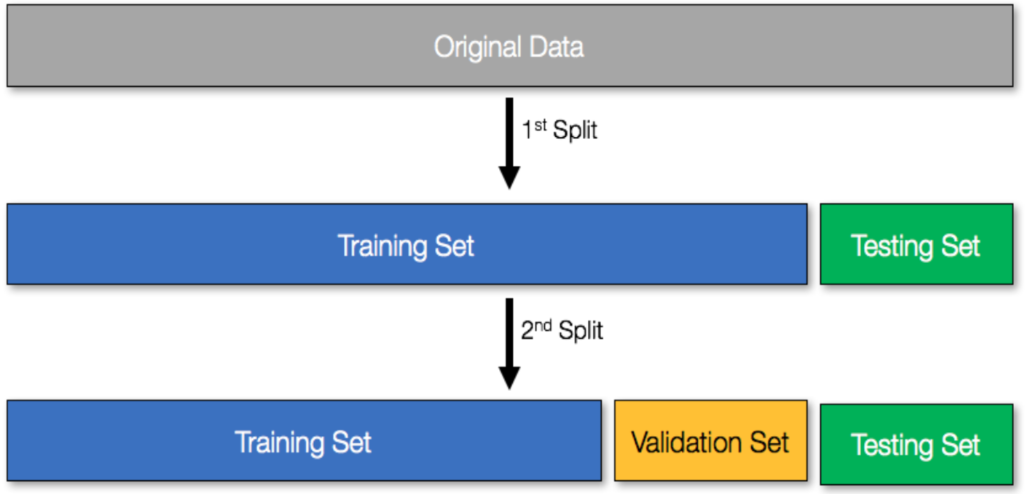


Un punto importante a tener en cuenta es que la división de los datos debe hacerse al azar. Si utilizamos un método no aleatorio para dividir los datos datos (por ejemplo, el primer 80% de las filas van al conjunto de entrenamiento y el el último 20% de las filas van al conjunto de pruebas), podríamos estar introduciendo introducir un sesgo en nuestro conjunto de entrenamiento y prueba. 

# **Actividad 1**
---
#**Parte 4: Arquitectura Del Modelo** - 

En este proyecto se utilizá un modelo profundo lo cual permite tener en cuenta la complejidad para el procesamiento de las diferentes características. 

La red neuronal tendrá cuatro capas ocultas. La primera capa oculta tendrá 128 nodos, y cada capa oculta sucesiva tendrá la mitad de nodos que su predecesora. Este tamaño de red neuronal es un buen punto de partida para este proyecto. Una regla general es que se debe empezar con una red neuronal pequeña y sólo aumentar su complejidad (tamaño) según sea necesario.

Entre cada capa oculta, se utilizara la función de activación ReLU para introducir la no linealidad en el modelo. Como se trata de un problema de regresión, sólo habrá un nodo en la capa de salida. Tenga en cuenta que no aplicamos la función de activación ReLU para la capa de salida, ya que hacerlo transformaría nuestras predicciones. 

El siguiente diagrama ilustra la arquitectura del modelo de la red neuronal profunda:


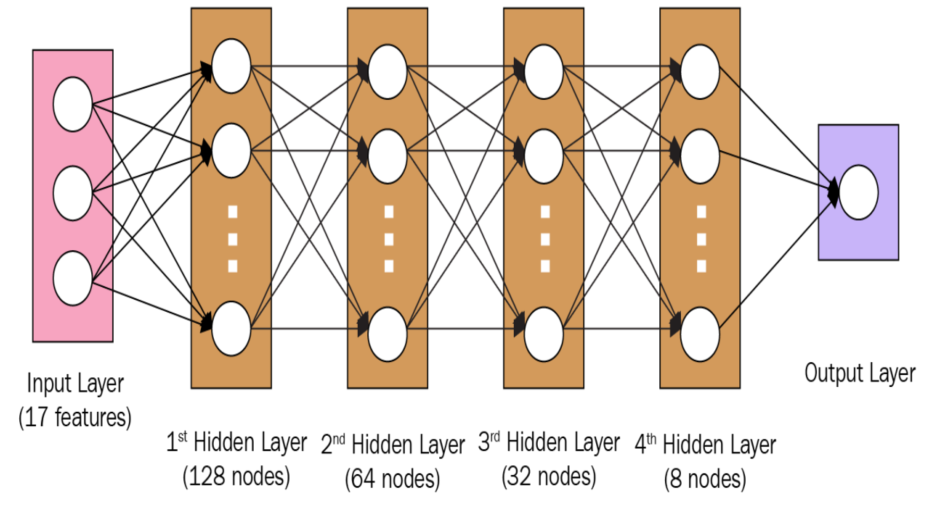

#### **Función de Perdida para Problemas de Regresión**

Es importante entender qué es la regresión y cómo afecta la arquitectura de la red neuronal. La tarea en este proyecto es predecir las tarifas de los taxis, que es una variable continua.

En la regresión, el error cuadrático medio (RMSE) suele utilizarse como métrica de error.

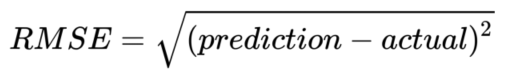

Observe que la fórmula toma el cuadrado de la diferencia entre el valor previsto y el valor real. Esto es para garantizar que las sobreestimaciones y las subestimaciones se penalicen por igual (ya que el cuadrado del error sería el mismo para ambas). 

El RMSE proporciona una función de pérdida para la red neuronal, permitiéndole ajustar sus pesos durante el proceso de entrenamiento para reducir el error de sus predicciones.

#### **Construcción del Modelo**

En primer lugar, se divide el DataFrame en las características de entrenamiento (X) y la variable objetivo que estamos tratando de predecir (y):


In [ ]:
X = df.loc[:, df.columns != 'fare_amount']
y = df.loc[:, 'fare_amount']

A continuación, se dividen los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) y posteriormente se crea la estructura del modelo.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation= 'relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))

Antes de entrenar el modelo, es una buena práctica verificar su estructura.
La función summary() produce una tabla que muestra el número de capas y el número de nodos en cada capa, así como el número de parámetros en cada capa (es decir, los pesos y los sesgos). Se puede comprobar que esto es coherente con la arquitectura del modelo definido previamente.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


#Parte 5: Compilación del Modelo

Antes de empezar a entrenar nuestro modelo, necesitamos definir los parámetros del proceso de entrenamiento, lo que se hace a través del método de compilación.

Hay tres parámetros diferentes que necesitamos definir para el
proceso de entrenamiento:

* **Optimizador**: Vamos a utilizar el optimizador adam, que es un optimizador popular en Keras. Para la mayoría de los conjuntos de datos, el optimizador adam funcionará bien sin mucho ajuste.

* **Función de pérdida**: Utilizaremos binary_crossentropy como nuestra función de pérdida ya que el problema en cuestión es un problema de clasificación binaria.

* **Métrica**: Utilizaremos la precisión (es decir, el porcentaje de muestras clasificadas correctamente) como nuestra métrica de evaluación.

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

# Parte 6: Entrenamiento del Modelo

Para entrenar nuestro modelo MLP definido en los pasos anteriores, vamos a llamar a la función de ajuste. Vamos a entrenar nuestro modelo durante 200 iteraciones:

In [ ]:
# Train the model for 200 epochs

model.fit(X_train, y_train, epochs=1, verbose=True)

12086/12086 [==============================] - 20s 2ms/step - loss: 20.5581 - mse: 20.5581


# Parte 7: Análisis de Resultados

Ahora que tenemos la red neuronal entrenada, vamos a utilizarla para hacer algunas predicciones para entender su precisión.
Se puede crear una función para hacer una predicción utilizando una muestra aleatoria del conjunto de pruebas:

In [ ]:
def predict_random(df_prescaled, X_test, model):
    sample = X_test.sample(n=1, random_state=np.random.randint(low=0, high=10000))
    idx = sample.index[0]

    actual_fare = df_prescaled.loc[idx,'fare_amount']
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
    hour = df_prescaled.loc[idx,'hour']
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare-actual_fare))

    print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))  
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))
    print("RMSE: ${:0.2f}".format(rmse))


La función **predict_random** extraerá una fila aleatoria del conjunto de pruebas y la introducirá en el modelo para su predicción. La función calculará y mostrará el RMSE de la predicción. 

Tenga en cuenta que **df_prescaled** es necesario para obtener los valores originales del día de la semana y la hora, ya que los valores del conjunto de pruebas ya han sido transformados anteriormente y ya no son legibles para los humanos (por ejemplo, un valor de día de la semana de -0,018778 no tiene mucho sentido para nosotros).

Se ejecuta la función **predict_random**, que se muestra a continuación, y ver qué tipo de resultados obtenemos:

In [ ]:
predict_random(df_prescaled, X_test, model)

        pickup_longitude  ...  dropoff_dist_Newark_Airport
189645         -0.300722  ...                    -1.466721

[1 rows x 17 columns]
Trip Details: Tuesday, 14:00hrs
Actual fare: $17.30
Predicted fare: $17.45
RMSE: $0.15


Por último, se concluyen los resultados calculando el RMSE para todo el conjunto de entrenamiento y prueba:

In [ ]:
from sklearn.metrics import mean_squared_error
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 3.55
Test RMSE: 3.61


Los valores del RMSE muestran que, por término medio, nuestro modelo predice una tarifa con una precisión de ~3,50 dólares.